In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 


<h1>Data Load and Segregation of Colorado Data</h1

In [2]:
# All data downloaded from https://www.samhsa.gov/ -- Substance Abuse and Mental Health Services Administration
#Load the 2018 data
substance_abuse_data_2018 = pd.read_csv("marijuana_data/TEDS-A-2018-DS0001-bndl-data-tsv/tedsa_puf_2018.csv",  
                                    error_bad_lines=False, na_filter=False, )

In [3]:
substance_abuse_data_2018.head()

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2018,20181712432,2,-9,4,1,7,-9,0,1,...,0,0,0,0,0,0,9,4,-9,1
1,2018,20181616794,2,-9,3,4,7,-9,0,1,...,0,0,0,0,0,0,9,4,-9,1
2,2018,20181593645,2,-9,3,1,7,-9,0,1,...,0,0,0,0,0,0,9,4,-9,3
3,2018,20181556355,2,-9,2,1,7,-9,0,1,...,0,0,0,0,0,0,9,4,-9,3
4,2018,20181632257,2,-9,3,3,7,-9,2,1,...,0,0,0,0,0,0,9,4,-9,1


In [4]:
colorado_data = substance_abuse_data_2018.loc[substance_abuse_data_2018["STFIPS"] == 8]
colorado_data.count()

ADMYR       83367
CASEID      83367
STFIPS      83367
CBSA2010    83367
EDUC        83367
            ...  
OTHERFLG    83367
DIVISION    83367
REGION      83367
IDU         83367
ALCDRUG     83367
Length: 62, dtype: int64

In [5]:
#Load the 2015-2017 data and append to end of colorado_data
substance_abuse_data_2017 = pd.read_csv("marijuana_data/TEDS-A-2015-2017-DS0001-bndl-data-tsv/tedsa_puf_2015_2017.csv",  
                                    error_bad_lines=False, na_filter=False)
substance_abuse_data_2017.head()

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2015,20151586539,2,-9,2,4,7,-9,1,1,...,0,0,0,0,0,0,9,4,-9,1
1,2015,20151477840,2,-9,3,2,7,6,5,7,...,0,0,0,0,0,0,9,4,0,2
2,2015,20151451605,2,-9,-9,1,7,6,2,7,...,0,0,0,0,0,0,9,4,-9,2
3,2015,20151409243,2,-9,5,2,6,-9,0,6,...,0,0,0,0,0,0,9,4,-9,1
4,2015,20151495385,2,-9,3,1,7,6,4,7,...,0,0,0,0,0,0,9,4,1,2


In [6]:
data2017 = substance_abuse_data_2017.loc[substance_abuse_data_2017["STFIPS"] == 8]
data2017.count()
colorado_data1 = colorado_data.append(data2017, ignore_index = True)
colorado_data1.count()

ADMYR       331803
CASEID      331803
STFIPS      331803
CBSA2010    331803
EDUC        331803
             ...  
OTHERFLG    331803
DIVISION    331803
REGION      331803
IDU         331803
ALCDRUG     331803
Length: 62, dtype: int64

In [7]:
#Load the 2010-2014 data and append to end of colorado_data
substance_abuse_data_2014 = pd.read_csv("marijuana_data/TEDS-A-2010-2014-DS0001-bndl-data-tsv/tedsa_puf_2010_2014.csv",  
                                    error_bad_lines=False, na_filter=False)
substance_abuse_data_2014.head()

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2010,20101576721,2,-9,5,2,7,-9,1,1,...,0,0,0,0,0,0,9,4,-9,3
1,2010,20101966013,2,-9,3,2,6,-9,0,6,...,0,0,0,0,0,0,9,4,-9,2
2,2010,20101573209,2,11260,2,4,6,6,0,7,...,0,0,0,0,0,0,9,4,-9,3
3,2010,20101607266,2,-9,5,4,6,-9,0,3,...,0,0,0,0,0,0,9,4,-9,2
4,2010,20101551365,2,27940,3,3,7,6,0,7,...,0,0,0,0,0,1,9,4,0,2


In [8]:
data2014 = substance_abuse_data_2014.loc[substance_abuse_data_2014["STFIPS"] == 8]
data2014.count()
colorado_data2 = colorado_data1.append(data2014, ignore_index = True)
colorado_data2.count()

ADMYR       753016
CASEID      753016
STFIPS      753016
CBSA2010    753016
EDUC        753016
             ...  
OTHERFLG    753016
DIVISION    753016
REGION      753016
IDU         753016
ALCDRUG     753016
Length: 62, dtype: int64

In [9]:
#Load the 2005-2009 data and append to end of colorado_data
substance_abuse_data_2009 = pd.read_csv("marijuana_data/TEDS-A-2005-2009-DS0001-bndl-data-tsv/tedsa_puf_2005_2009.csv",  
                                    error_bad_lines=False, na_filter=False)
substance_abuse_data_2009.head()

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2005,20051239403,1,22520,3,1,6,-9,5,1,...,0,0,0,0,0,0,6,3,-9,3
1,2005,20051143554,1,22520,-9,4,6,-9,3,3,...,0,0,0,0,0,0,6,3,-9,2
2,2005,20051120149,1,22520,2,1,6,-9,1,1,...,0,0,0,0,0,0,6,3,-9,3
3,2005,20051082599,1,22520,3,2,6,-9,-9,1,...,0,0,0,0,0,0,6,3,0,3
4,2005,20051159099,1,22520,3,4,6,-9,2,1,...,0,0,0,0,0,0,6,3,0,3


In [10]:
data2009 = substance_abuse_data_2009.loc[substance_abuse_data_2009["STFIPS"] == 8]
data2009.count()
colorado_data_all = colorado_data2.append(data2009, ignore_index = True)
colorado_data_all.count()

ADMYR       1161884
CASEID      1161884
STFIPS      1161884
CBSA2010    1161884
EDUC        1161884
             ...   
OTHERFLG    1161884
DIVISION    1161884
REGION      1161884
IDU         1161884
ALCDRUG     1161884
Length: 62, dtype: int64

<h2>Summary of Data Import</h2>
Initial data included all states, but this study only looks at the number of substance abuse treatment admissions from 2005-2018 (the last year for which data is available from the SAMHSA website) for the state of Colorado, one of the first states to fully legalize marijuana for all uses. 

<b>The total number: 1,161,884</b>

<h1>Translating Numeric Labels to Descriptive</h1>

<h3>Type of Treatment Service/Setting</h3?

1 Detox, 24-hour, hospital inpatient

2 Detox, 24-hour, free-standing residential

3 Rehab/residential, hospital (non-detox)

4 Rehab/residential, short term (30 days or fewer)

5 Rehab/residential, long term (more than 30 days)

6 Ambulatory, intensive outpatient

7 Ambulatory, non-intensive outpatient

8 Ambulatory, detoxification



<h1>Breakdown of Type of Treatment Service/Setting</h1>

In [57]:
colorado_service_group = colorado_data_all.groupby('SERVICES').count()
colorado_service_group_sorted = colorado_service_group.sort_index()
bars = ('Detox-24-hr-hosp-inpat.', 'Detox-24-hr-freestd-res', 
       'Rehab/res-hosp(non-detox)', 'Rehab/res-shortterm(30 days or fewer)',
       'Rehab/res-longterm(more than 30 days)', 'Ambulatory-intensive-outpat',
       'Ambulatory-nonintensive-outpat', 'Ambulatory-detox')
colorado_service_group_sorted

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
SERVICES,,,,,,,,,,,,,,,,,,,,,
1,5896,5896,5896,5896,5896,5896,5896,5896,5896,5896,...,5896,5896,5896,5896,5896,5896,5896,5896,5896,5896
2,696516,696516,696516,696516,696516,696516,696516,696516,696516,696516,...,696516,696516,696516,696516,696516,696516,696516,696516,696516,696516
3,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,...,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
4,66946,66946,66946,66946,66946,66946,66946,66946,66946,66946,...,66946,66946,66946,66946,66946,66946,66946,66946,66946,66946
5,30414,30414,30414,30414,30414,30414,30414,30414,30414,30414,...,30414,30414,30414,30414,30414,30414,30414,30414,30414,30414
6,47615,47615,47615,47615,47615,47615,47615,47615,47615,47615,...,47615,47615,47615,47615,47615,47615,47615,47615,47615,47615
7,312297,312297,312297,312297,312297,312297,312297,312297,312297,312297,...,312297,312297,312297,312297,312297,312297,312297,312297,312297,312297
8,911,911,911,911,911,911,911,911,911,911,...,911,911,911,911,911,911,911,911,911,911


In [58]:
services = colorado_service_group_sorted.index
num_treatments = colorado_service_group_sorted['CASEID']

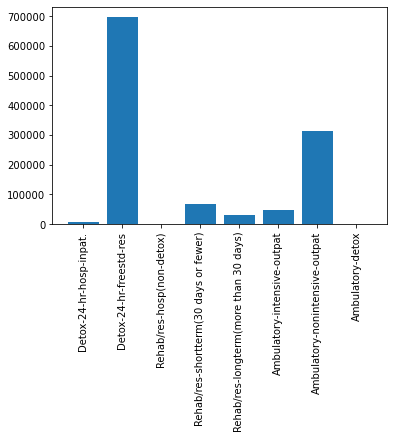

In [55]:
# Create bars
plt.bar(services, num_treatments)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)

# Show graphic
plt.show()

<h1>Breakdown of Primary and Secondary Substance Use</h1>

1 None 36,667 1.9%

2 Alcohol 569,998 29.4%

3 Cocaine/crack 107,872 5.6%

4 Marijuana/hashish 227,647 11.8%

5 Heroin 502,845 26.0%

6 Non-prescription methadone 3,030 0.2%

7 Other opiates and synthetics 144,337 7.5%

8 PCP 4,876 0.3%

9 Hallucinogens 2,261 0.1%

10 Methamphetamine/speed 190,937 9.9%

11 Other amphetamines 8,812 0.5%

12 Other stimulants 2,661 0.1%

13 Benzodiazepines 18,533 1.0%

14 Other tranquilizers 151 0.0%

15 Barbiturates 999 0.1%

16 Other sedatives or hypnotics 2,024 0.1%

17 Inhalants 829 0.0%

18 Over-the-counter medications 740 0.0%

19 Other drugs 14,292 0.7%

-9 Missing/unknown/not collected/invalid 96,030 5.0%

In [59]:
colorado_primary_sub = colorado_data_all.groupby('SUB1').count()
colorado_primary_sub_sorted = colorado_primary_sub.sort_index()
bars = ('None', 'Alcohol', 'Cocaine/Crack', 'Marijuana/Hashish', 'Heroin', 'Non-Prescribed Methadone', 'Other opiates and synthetics',
       'PCP', 'Hallucinogens', 'Methamphetamine/Speed', 'Other Amphetamines', 'Other Stimulants', 'Benzodiazepines',
       'Other Tranquilizers', 'Barbituates', 'Other Sedatives/Hypnotics', 'Inhalants', 'OTC Medications', 'Other drugs')
colorado_primary_sub_sorted

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
SUB1,,,,,,,,,,,,,,,,,,,,,
-9,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,807672,807672,807672,807672,807672,807672,807672,807672,807672,807672,...,807672,807672,807672,807672,807672,807672,807672,807672,807672,807672
3,43463,43463,43463,43463,43463,43463,43463,43463,43463,43463,...,43463,43463,43463,43463,43463,43463,43463,43463,43463,43463
4,90352,90352,90352,90352,90352,90352,90352,90352,90352,90352,...,90352,90352,90352,90352,90352,90352,90352,90352,90352,90352
5,65747,65747,65747,65747,65747,65747,65747,65747,65747,65747,...,65747,65747,65747,65747,65747,65747,65747,65747,65747,65747
6,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
7,30204,30204,30204,30204,30204,30204,30204,30204,30204,30204,...,30204,30204,30204,30204,30204,30204,30204,30204,30204,30204
8,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
9,873,873,873,873,873,873,873,873,873,873,...,873,873,873,873,873,873,873,873,873,873
